## Offset between the external power meter and energy scope

Here we study the offset between the wattmeter data and energy scope. So
- We only study 'data.data.etotal(W)'
- We don't interpolate the wattmeter data (we need exact values)

## Imports and variables

In [1]:
REPOSITORY_DIR = "../../" # TO MODIFY
prefix = [REPOSITORY_DIR + "results/GPU_20_04/", REPOSITORY_DIR + "results/GPU_19_04/"] # ADD AS MANY FOLDER AS YOU NEED
#prefix = [REPOSITORY_DIR + "results/CPU_08_11/"]

In [2]:
import sys
sys.path.append(REPOSITORY_DIR + "/code/")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.plots import FONTSIZE, COLOR
from utils.process_results import add_benchmark_id_to_merged_timeseries, cleaning_table
import numpy as np
import time

## Gathering data

In [4]:
energy_scope_df = pd.concat([pd.read_csv(file + 'es_ts.csv') for file in prefix])
watt_df = pd.concat([pd.read_csv(file + 'g5k_metrics.csv') for file in prefix])
exp_table = pd.concat([pd.read_csv(file + 'processed_table.csv') for file in prefix])

exp_table = cleaning_table(exp_table, watt_df, energy_scope_df)

In [6]:
watt_df.head()

,timestamp,wattmetre_power_watt,timestamp_sec,bmc_node_power_watt
0,2022-04-20T17:49:26+02:00,980.684,1.650470e+09,NaN
1,2022-04-20T17:49:27+02:00,982.632,1.650470e+09,NaN
2,2022-04-20T17:49:28+02:00,986.702,1.650470e+09,NaN
3,2022-04-20T17:49:29+02:00,992.560,1.650470e+09,NaN
4,2022-04-20T17:49:30+02:00,995.308,1.650470e+09,NaN


In [7]:
grouped_watt_df = watt_df.groupby(by=['timestamp_sec']).mean().reset_index()
grouped_watt_df['timestamp'] = pd.to_datetime(grouped_watt_df['timestamp_sec'].apply(lambda x: time.asctime(time.localtime(x))))
grouped_watt_df.head()

,timestamp_sec,wattmetre_power_watt,bmc_node_power_watt,timestamp
0,1.650389e+09,1007.095,900.0,2022-04-19 19:26:44
1,1.650389e+09,1010.934,NaN,2022-04-19 19:26:45
2,1.650389e+09,1013.723,NaN,2022-04-19 19:26:46
3,1.650389e+09,1015.789,NaN,2022-04-19 19:26:47
4,1.650389e+09,1015.270,NaN,2022-04-19 19:26:48


# Merge

In [8]:
merged_df = pd.merge(energy_scope_df[['timestamp_sec','data.data.etotal(W)']],grouped_watt_df, on='timestamp_sec', how='outer').sort_values(by=['timestamp_sec'])
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp_sec'].apply(lambda x: time.asctime(time.localtime(x))))

# compute offset
merged_df['wattmetre_es_diff'] = abs(merged_df['wattmetre_power_watt'] - merged_df['data.data.etotal(W)'])
merged_df['bmc_es_diff'] = abs(merged_df['bmc_node_power_watt'] - merged_df['data.data.etotal(W)'])

In [9]:
merged_df[:15]

,timestamp_sec,data.data.etotal(W),wattmetre_power_watt,bmc_node_power_watt,timestamp,wattmetre_es_diff,bmc_es_diff
130136,1.650389e+09,NaN,1007.095,900.0,2022-04-19 19:26:44,NaN,NaN
130137,1.650389e+09,NaN,1010.934,NaN,2022-04-19 19:26:45,NaN,NaN
13293,1.650389e+09,638.859,1013.723,NaN,2022-04-19 19:26:46,374.864,NaN
13294,1.650389e+09,638.859,NaN,NaN,2022-04-19 19:26:46,NaN,NaN
13295,1.650389e+09,633.505,1015.789,NaN,2022-04-19 19:26:47,382.284,NaN
13296,1.650389e+09,633.842,NaN,NaN,2022-04-19 19:26:47,NaN,NaN
13297,1.650389e+09,633.483,1015.270,NaN,2022-04-19 19:26:48,381.787,NaN
13298,1.650389e+09,634.702,NaN,NaN,2022-04-19 19:26:48,NaN,NaN
13299,1.650389e+09,634.073,1015.574,900.0,2022-04-19 19:26:49,381.501,265.927
13300,1.650389e+09,632.930,NaN,NaN,2022-04-19 19:26:49,NaN,NaN


In [10]:
b_df = add_benchmark_id_to_merged_timeseries(exp_table, merged_df, time_before_start=0, time_after_end=0)

We filter the beggining and the end.

## Distribution

idle sh
mg D
lu D
ep E


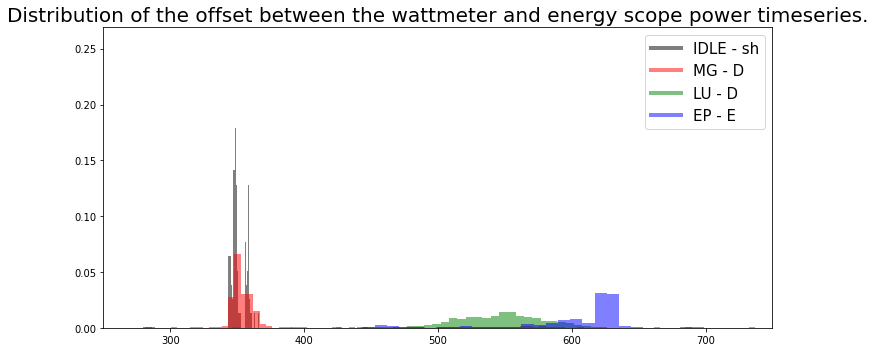

In [10]:
import itertools

FONTSIZE=20
COLOR=['black', 'red', 'green', 'blue']
stat_cols = None
plot_limits=None 
if_col_legend=True 
if_bench_legend=True
bbox_to_anchor=(0,1)
loc='upper left'
nb_cols=1

bench_idx = exp_table.set_index(['gpu_0_appli','gpu_0_appli_class']).index.unique()
exp_number = 1
if exp_number%nb_cols:
    nb_rows = exp_number//nb_cols+1
else:
    nb_rows = exp_number//nb_cols

FIGSIZE = (10,5)
fig, axes = plt.subplots(
    nrows=nb_rows, 
    ncols=nb_cols, 
    sharex=False, 
    sharey=True, 
    figsize=FIGSIZE,
)
color = itertools.cycle(COLOR)
legend = {'colors':[], 'values':[]}

for i in range(len(bench_idx)):
    c=next(color)
    appli = bench_idx[i][0]
    appli_class = bench_idx[i][1]
    print(appli, appli_class)
    legend_value = "{} - {}".format(appli.upper(), appli_class)
    legend['colors'].append(c)
    legend['values'].append(legend_value)
    exp_ids = exp_table[(
        exp_table['gpu_0_appli']==appli)&(
        exp_table['gpu_0_appli_class']==appli_class)&(
        exp_table['tool_name']=='energy scope'
    )]['gpu_0_benchmark_id'].values

    axes.hist(
        b_df[b_df['benchmark_id'].isin(exp_ids)].wattmetre_es_diff.dropna().values,
        bins=200,
        color=c,
        alpha=0.5,
        density=True,
    )


from matplotlib.lines import Line2D

color_lines = [Line2D([0], [0], color=c, linewidth=4, alpha=0.5) for c in legend['colors']]

axes.legend(
    color_lines, 
    legend['values'], 
    bbox_to_anchor=(1, 1), 
    fontsize=15,
)

axes.set_xlim((250,750))
axes.set_title("Distribution of the offset between the wattmeter and energy scope power timeseries.",fontsize=FONTSIZE)
fig.tight_layout()

The distribution of the offset vary a lot depending on the benchmark.

## Power / Power graph

### With matplotlib


idle sh
mg D
lu D
ep E


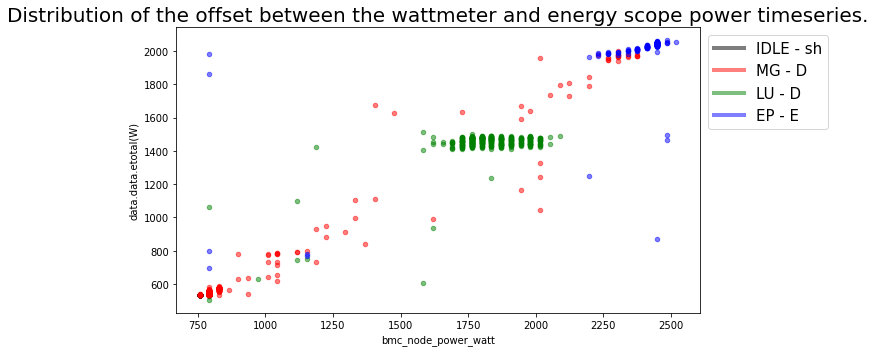

In [11]:
import itertools

FONTSIZE=20
COLOR=['black', 'red', 'green', 'blue']
stat_cols = None
plot_limits=None 
if_col_legend=True 
if_bench_legend=True
bbox_to_anchor=(0,1)
loc='upper left'
nb_cols=1

bench_idx = exp_table.set_index(['gpu_0_appli','gpu_0_appli_class']).index.unique()
exp_number = 1
if exp_number%nb_cols:
    nb_rows = exp_number//nb_cols+1
else:
    nb_rows = exp_number//nb_cols

FIGSIZE = (10,5)
fig, axes = plt.subplots(
    nrows=nb_rows, 
    ncols=nb_cols, 
    sharex=False, 
    sharey=True, 
    figsize=FIGSIZE,
)
color = itertools.cycle(COLOR)
legend = {'colors':[], 'values':[]}

for i in range(len(bench_idx)):
    c=next(color)
    appli = bench_idx[i][0]
    appli_class = bench_idx[i][1]
    print(appli, appli_class)
    legend_value = "{} - {}".format(appli.upper(), appli_class)
    legend['colors'].append(c)
    legend['values'].append(legend_value)
    exp_ids = exp_table[(
        exp_table['gpu_0_appli']==appli)&(
        exp_table['gpu_0_appli_class']==appli_class)&(
        exp_table['tool_name']=='energy scope'
    )]['gpu_0_benchmark_id'].values
    b_df[b_df['benchmark_id'].isin(exp_ids)].plot.scatter(
        ax=axes,
        x='bmc_node_power_watt', #wattmetre_power_watt
        y='data.data.etotal(W)',
        color=c,
        alpha=0.5,
    )


from matplotlib.lines import Line2D

color_lines = [Line2D([0], [0], color=c, linewidth=4, alpha=0.5) for c in legend['colors']]

axes.legend(
    color_lines, 
    legend['values'], 
    bbox_to_anchor=(1, 1), 
    fontsize=15,
)
axes.set_title("Distribution of the offset between the wattmeter and energy scope power timeseries.",fontsize=FONTSIZE)
fig.tight_layout()

### With seaborn

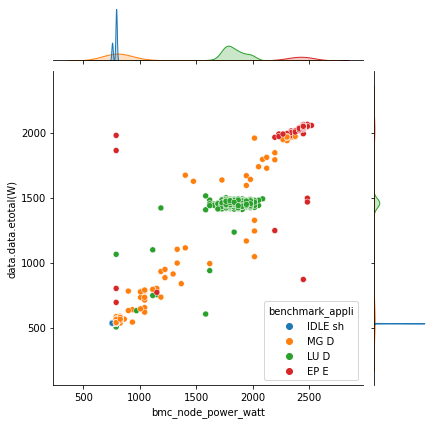

In [13]:
import seaborn as sns
sns.jointplot(
    data=b_df.dropna(subset=["bmc_node_power_watt", 'data.data.etotal(W)']).reset_index(), 
    x="bmc_node_power_watt",
    y='data.data.etotal(W)',
    hue='benchmark_appli',
    )

### Adding the linear regression 

Regression: BMC = 1.0937004477307142 x Energy Scope + 216.0347542230445
Text(0, 0, 'EP E')
Regression: Ext. power meter = 1.1639006193916028 x Energy Scope + 281.8582777165393
Text(0, 0, 'EP E')
Regression: Ext. power meter = 1.0466685480773594 x BMC + 79.98670714030663
Text(0, 0, 'EP E')


<Figure size 1440x1440 with 0 Axes>

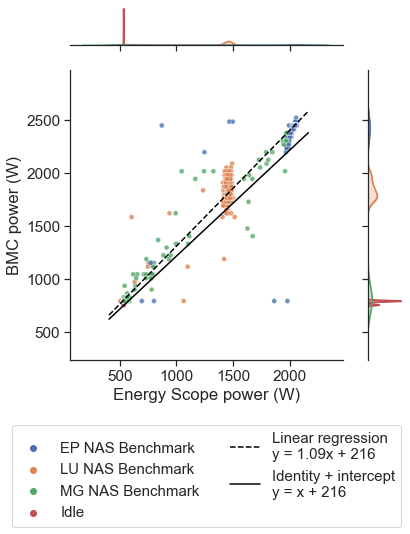

<Figure size 1440x1440 with 0 Axes>

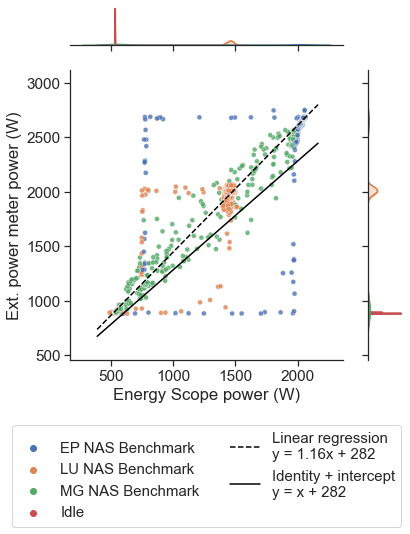

<Figure size 1440x1440 with 0 Axes>

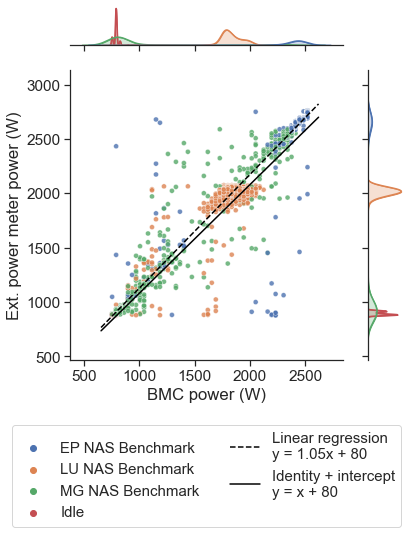

In [14]:
def regression_joint_plot(df, vertical_col, horizontal_col):
    # Regression

    from sklearn import linear_model

    plot_df = df.dropna(subset=[horizontal_col['col'], vertical_col['col']]).reset_index()
    X = plot_df[[horizontal_col['col']]]
    y = plot_df[vertical_col['col']]

    model = linear_model.LinearRegression()
    results = model.fit(X, y)

    plt.figure(figsize=(20,20))
    sns.set_context("paper")
    sns.set(font_scale = 1.4)
    sns.set_style("ticks")
    grid = sns.jointplot(
        data=plot_df, 
        x=horizontal_col['col'],
        y=vertical_col['col'],
        hue='benchmark_appli',
        hue_order=['EP E', 'LU D', 'MG D', 'IDLE sh'],
        s=25, alpha=.8
        )
    #grid.plot_joint(sns.scatterplot,)
    # grid.plot_joint(sns.kdeplot, zorder=0, 
    #     #levels=6, thresh=0.0001,
    #     levels=[.0001, .0005, .001, .005, .01, .05],
    #     )
    grid.plot_marginals(sns.kdeplot)
    grid.set_axis_labels('{} power (W)'.format(horizontal_col['name']), '{} power (W)'.format(vertical_col['name'])) #, fontsize=16)

    the_x = plot_df[horizontal_col['col']].sort_values().values
    the_x = np.concatenate([np.array([the_x[0]-100]),the_x, np.array([the_x[-1]+100])])
    the_y = the_x + results.intercept_ #the_x - 452
    the_z = results.coef_[0]*the_x + results.intercept_
    print("Regression: {} = {} x {} + {}".format(vertical_col['name'], results.coef_[0], horizontal_col['name'], results.intercept_))

    suptitle_text = "\ny = {}x + {}".format( round(results.coef_[0], 2), round(results.intercept_), 2)
    # vertical_col['name'], horizontal_col['name'], 
    grid.fig.axes[0].plot(
        the_x,
        the_z, 
        linestyle='--', 
        color='black',
        label='Linear regression'+suptitle_text,
    )
    grid.fig.axes[0].plot(
        the_x,
        the_y, 
        linestyle='-', 
        color='black',
        label='Identity + intercept\ny = x + {}'.format(round(results.intercept_)),
    )
    # dummy plot to adapt legend
    grid.fig.axes[0].plot(
        [1000],
        [1000], 
        color='w',
        alpha=0,
        label=' ',
    )

    grid.figure.tight_layout() 
    # grid.figure.suptitle(
    #     suptitle_text, 
    #     horizontalalignment="center", 
    #     verticalalignment="baseline", 
    #     y=1.01,
    #     ) 
    #sns.despine(left=True, bottom=True)

    new_labels = [
            'EP NAS Benchmark', 
            'LU NAS Benchmark', 
            'MG NAS Benchmark', 
            'Idle', 
            'Linear regression'+suptitle_text,
            'Identity + intercept\ny = x + {}'.format(round(results.intercept_)), 
        ]


    leg = grid.fig.axes[0].legend(
        bbox_to_anchor=(0.5,-0.2),
        loc='upper center',
        ncol=2,
        fontsize=15,
        ) #.remove()

    print(leg.texts[0])
    for t, l in zip(
        leg.texts, 
        new_labels
        ):
        t.set_text(l)

    grid.fig.savefig(
        "/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/offset.pdf",
        bbox_inches='tight',
        )
    grid.fig.savefig(
        "/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/offset.png",
        bbox_inches='tight',
    )
    # for i in range(len(grid.fig.axes[0].legend().texts)):
    #     grid.fig.axes[0].legend().texts[i].set_text(new_labels[i])
    #     print(grid.fig.axes[0].legend().texts[i])

    #grid.ax_marg_x.set_xlim(min(the_x))
    #grid.ax_marg_y.set_ylim(min(the_y))

regression_joint_plot(b_df, {"col": "bmc_node_power_watt", "name":"BMC"}, {"col": "data.data.etotal(W)", "name":"Energy Scope"})
regression_joint_plot(b_df, {"col": "wattmetre_power_watt", "name":"Ext. power meter"}, {"col": "data.data.etotal(W)", "name":"Energy Scope"})
regression_joint_plot(b_df, {"col": "wattmetre_power_watt", "name":"Ext. power meter"}, {"col": "bmc_node_power_watt", "name":"BMC"})

Slight bias between the BMC and Energy Scope, which means that what is causing the bias is both between the BMC and the external power meter and between the BMC and Energy Scope: fans and power supply.

# Correlation

In [16]:
plot_df = b_df.dropna(subset=["wattmetre_power_watt", 'data.data.etotal(W)','bmc_node_power_watt'])[["wattmetre_power_watt", 'data.data.etotal(W)','bmc_node_power_watt']].reset_index(drop=True)
plot_df.corr()

,wattmetre_power_watt,data.data.etotal(W),bmc_node_power_watt
wattmetre_power_watt,1.000000,0.978570,0.978214
data.data.etotal(W),0.978570,1.000000,0.980356
bmc_node_power_watt,0.978214,0.980356,1.000000


The correlation is high.

# Let's remove the up and down 
By cutting the first and last 4 seconds, we remove the errors due the delay in measurement. 

In [17]:
b_df.columns

Index(['timestamp_sec', 'data.data.etotal(W)', 'wattmetre_power_watt',
       'bmc_node_power_watt', 'timestamp', 'wattmetre_es_diff', 'bmc_es_diff',
       'sec', 'benchmark_id', 'benchmark_appli'],
      dtype='object')

In [18]:
b_df_cut = add_benchmark_id_to_merged_timeseries(exp_table, merged_df, time_before_start=-3, time_after_end=-3)

Regression: Ext. power meter = 1.1813021912048554 x Energy Scope + 260.33767506779554
Text(0, 0, 'EP E')


<Figure size 1440x1440 with 0 Axes>

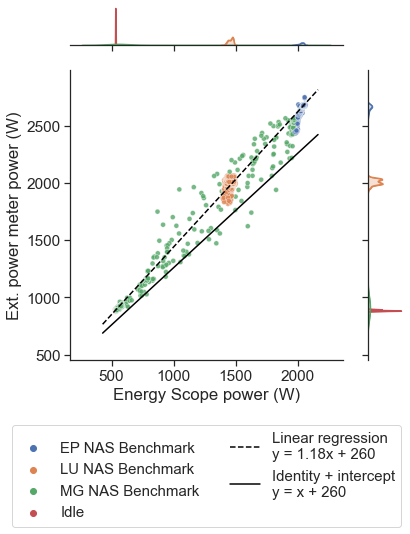

In [19]:
regression_joint_plot(b_df_cut, {"col": "wattmetre_power_watt", "name":"Ext. power meter"}, {"col": "data.data.etotal(W)", "name":"Energy Scope"})

We used this graph in the article.